# Ch 2 - Perceptron and Adaline

## Perceptron

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [74]:
class Perceptron(object):
    """
    Perceptron classifier

    Parameters
    -----
    eta: float
        Learning rate(between 0 and 1)
    n_iter: int
        Passes over the training dataset

    Attributes
    -----
    w_: 1d array
        Weights after fitting
    errors_: list
        Number of misclassifications in every epoch
    """

    def __init__(self, eta, n_iter,random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_seed = random_seed
    
    def fit(self,X,y):

        """

        param X: {array-like}, shape = [n_samples,n_features]
                Training set where n_samples = #samples and n_features = #features
        param y: array-like, target vaules
        :return:
                self:object
        """
        rgen = np.random.RandomState(self.random_seed)
        #self.w_ = np.zeros(1+X.shape[1]) # w0 + weights for all features initialised at zero
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.errors_ = []

        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self 
    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X,self.w_[1:]) + self.w_[0]

    def predict(self,X):
        """Return class label after unit step"""
        #return np.where(self.net_input(X)>= 0.0,1,-1) # if z>0 return +1, otherwise return -1
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
     



In [59]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
y = df.iloc[0:100,4].values # the first 100 are the Setosa and Versicolor, these values are in column 4. y is an ndarray
y = np.where(y=='Iris-versicolor',1,-1)
X = df.iloc[0:100,[0,2]].values # X contains the values of first 2 features - petals length and sepal length. X is a 100x2 ndarray

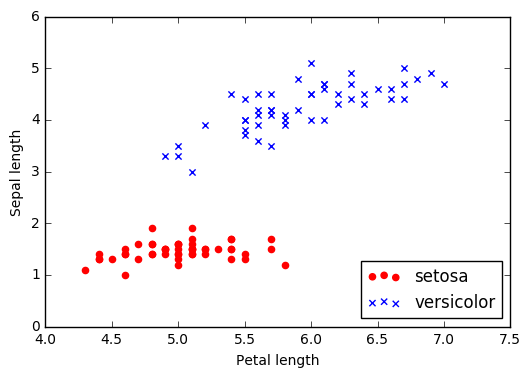

In [61]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.legend(loc='lower right')
plt.show()

In [62]:
ppn = Perceptron(0.1,10)

In [63]:
ppn.fit(X,y)

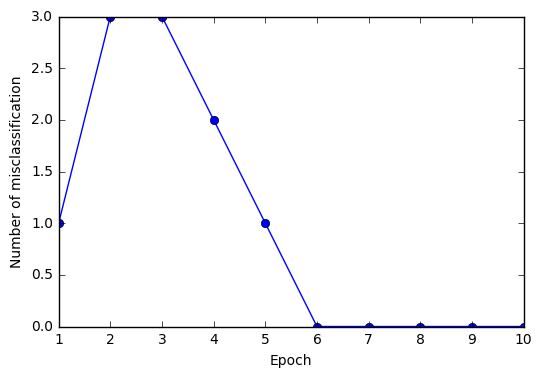

In [64]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Number of misclassification')
plt.show()

## Visualising the perceptron

In [65]:
from matplotlib.colors import ListedColormap

In [66]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    # marker generators and coloup map
    markers = ('s','x','o','^','v')
    colors = ('lightgreen','purple','red','blue','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() +1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
    

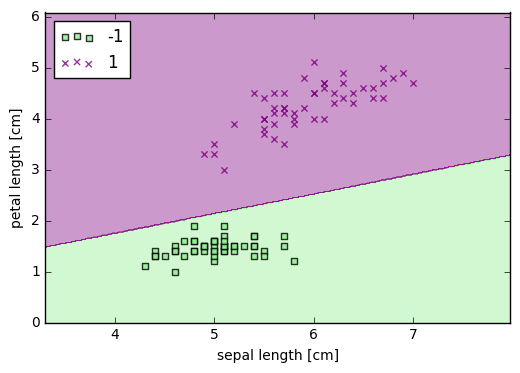

In [67]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [68]:
# X.T == np.transpose(X)

In [69]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Adaline - The adaptive linear perceptron

In [70]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

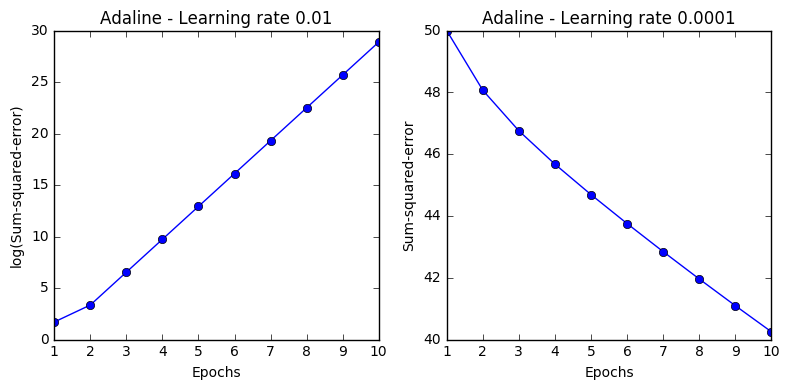

In [71]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
# plt.savefig('./adaline_1.png', dpi=300)
plt.show()

In [72]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

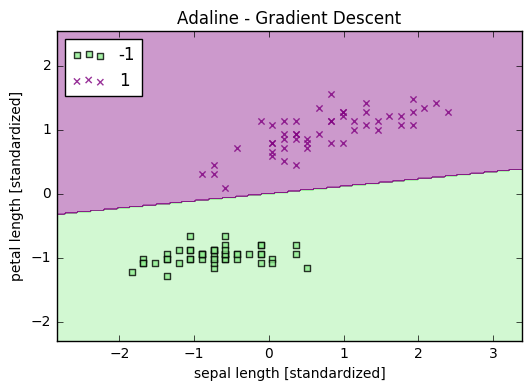

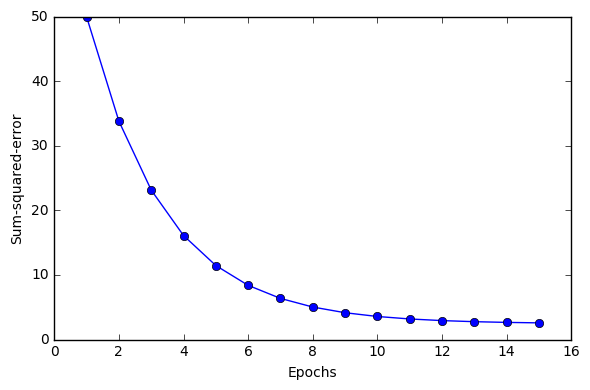

In [73]:
ada = AdalineGD(eta=0.01,n_iter=15)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
#plt.tight_layout()
# plt.savefig('./adaline_2.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('./adaline_3.png', dpi=300)
plt.show()

# Large scale + stochastic linear descent

In [77]:
from numpy.random import seed

In [102]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
    weights after fitting
    errors_ : list
    Number of misclassifications in every epoch.
    shuffle : bool (default: True)
    Shuffles training data every epoch
    if True to prevent cycles.
    random_state : int (default: None)
    Set random state for shuffling
    and initializing the weights.
    """
    
    def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):
        self.eta=eta
        self.n_iter = n_iter
        self.w_initialized=False
        self.shuffle=shuffle
        if random_state:
            seed(random_state)
            
    def fit(self,X,y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
        is the number of samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self,X,y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self,X,y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self,m):
        """Initialize weights to zero"""
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
    
    def _update_weights(self,xi,target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = target - output
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self,X):
        """Calculate net imput"""
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def activation(self,X):
        """Compute lineat activation"""
        return self.net_input(X)
    
    def predict(self,X):
        """Returns class label after unit step (quantizer) """
        return np.where(self.activation(X)>= 0.0,1,-1)
    
        
    

In [103]:
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada.fit(X_std,y)

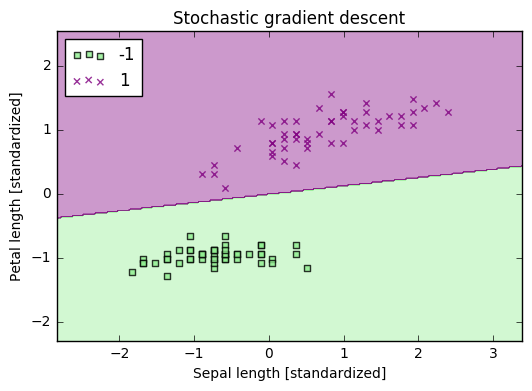

In [104]:
plot_decision_regions(X_std,y,classifier=ada)
plt.title("Stochastic gradient descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("Petal length [standardized]")
plt.legend(loc="upper left")
plt.show()

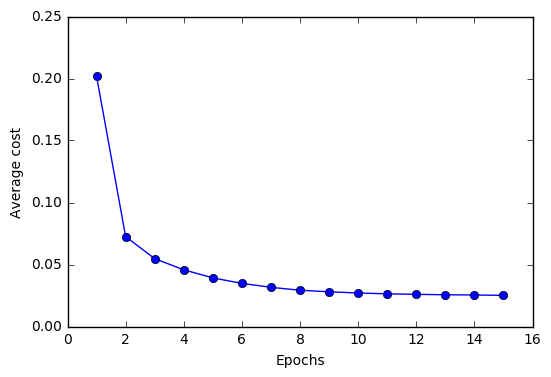

In [105]:
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average cost')
plt.show()

In [101]:
len(ada.cost_)

100